###Project Name : Time Series Forecasting with LSTM: DOM Hourly Prediction
###Project Description : This project presents the implementation of Machine Learning to predict Time Series data using sequential model architecture with Long Short-Term Memory (LSTM). The dataset used is the Hourly DOM, which records observations at hourly intervals. The model is designed to understand patterns and trends in time series data to make accurate predictions. The use of a learning rate optimizer helps improve the efficiency and convergence speed of the model.
###Dataset : DOM hourly Dataset
###Tools : Google Colaboratory

**Created by : Baharuddin Nur Maulana**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta

In [ ]:
data_train = pd.read_csv('DOM_hourly.csv')
data_train.head()

,Datetime,DOM_MW
0,2005-12-31 01:00:00,9389.0
1,2005-12-31 02:00:00,9070.0
2,2005-12-31 03:00:00,9001.0
3,2005-12-31 04:00:00,9042.0
4,2005-12-31 05:00:00,9132.0


In [ ]:
data_train.isnull().sum()

Datetime    0
DOM_MW      0
dtype: int64

In [ ]:
def plot_series(time, series, format='-', start=0, end=None):
  plt.plot(time[start:end], series[start:end], format)
  plt.xlabel("Time")
  plt.ylabel("Value")
  plt.grid(True)

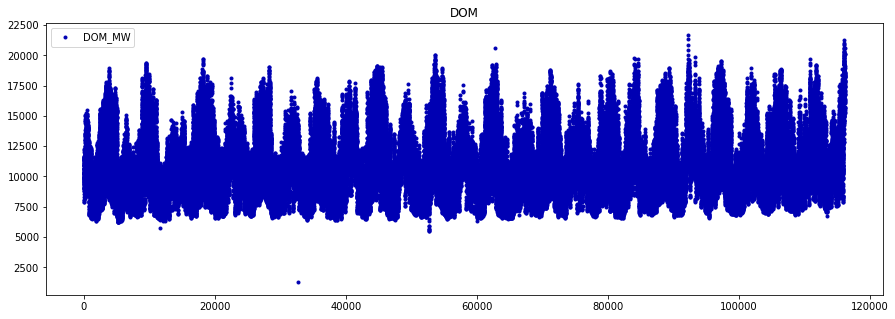

In [ ]:
color_pal = ["#0000b3", "#0010d9", "#0020ff", "#0040ff", "#0060ff", "#0080ff", "#009fff", "#00bfff", "#00ffff"]
_ = data_train.plot(style='.', figsize=(15,5), color=color_pal[0], title='DOM')

In [ ]:
data_train['Dates'] = pd.to_datetime(data_train['Datetime']).dt.date
data_train['Time'] = pd.to_datetime(data_train['Datetime']).dt.time
data_train.drop(columns=['Datetime'],inplace=True,axis=1)

In [ ]:
data_train

,DOM_MW,Dates,Time
0,9389.0,2005-12-31,01:00:00
1,9070.0,2005-12-31,02:00:00
2,9001.0,2005-12-31,03:00:00
3,9042.0,2005-12-31,04:00:00
4,9132.0,2005-12-31,05:00:00
...,...,...,...
116184,18418.0,2018-01-01,20:00:00
116185,18567.0,2018-01-01,21:00:00
116186,18307.0,2018-01-01,22:00:00
116187,17814.0,2018-01-01,23:00:00


In [ ]:
data_train.set_index(data_train['Dates'],inplace=True)
data_train=data_train.drop(['Dates'],axis=1)

In [ ]:
data_train

,DOM_MW,Time
Dates,,
2005-12-31,9389.0,01:00:00
2005-12-31,9070.0,02:00:00
2005-12-31,9001.0,03:00:00
2005-12-31,9042.0,04:00:00
2005-12-31,9132.0,05:00:00
...,...,...
2018-01-01,18418.0,20:00:00
2018-01-01,18567.0,21:00:00
2018-01-01,18307.0,22:00:00


In [ ]:
data_train=data_train.drop(['Time'],axis=1)

In [ ]:
data_train

,DOM_MW
Dates,
2005-12-31,9389.0
2005-12-31,9070.0
2005-12-31,9001.0
2005-12-31,9042.0
2005-12-31,9132.0
...,...
2018-01-01,18418.0
2018-01-01,18567.0
2018-01-01,18307.0


In [ ]:
dataset = data_train.values
training_data_len = int(np.ceil( len(dataset) * .80))
training_data_len

92952

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.39886263],
       [0.38322385],
       [0.37984116],
       ...,
       [0.83606236],
       [0.81189332],
       [0.7929699 ]])

In [ ]:
train_data = scaled_data[0:int(training_data_len),:]

x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True,input_shape= (x_train.shape[1], 1)),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.LSTM(128, return_sequences=False),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1),
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 128)           66560     
                                                                 
 dropout_2 (Dropout)         (None, 30, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 206,465
Trainable params: 206,465
Non-tr

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < 0.1 ):
      print("\n MAE < 10%")

  def on_train_end(self, epoch, logs={}):
    print('Done')

callbacks = myCallback()

In [ ]:
Ir_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1.000e-04 * 10**(epoch/1))

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(x_train,y_train, epochs=100, batch_size=128, validation_split=0.2, shuffle=False, callbacks=[callbacks])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


581/581 [==============================] - 9s 10ms/step - loss: 0.0341 - mae: 0.2109 - val_loss: 0.0075 - val_mae: 0.0924
Epoch 2/100
578/581 [============================>.] - ETA: 0s - loss: 0.0072 - mae: 0.0928
 MAE < 10%
581/581 [==============================] - 5s 9ms/step - loss: 0.0072 - mae: 0.0927 - val_loss: 0.0062 - val_mae: 0.0888
Epoch 3/100
576/581 [============================>.] - ETA: 0s - loss: 0.0070 - mae: 0.0928
 MAE < 10%
581/581 [==============================] - 5s 9ms/step - loss: 0.0069 - mae: 0.0926 - val_loss: 0.0062 - val_mae: 0.0888
Epoch 4/100
576/581 [============================>.] - ETA: 0s - loss: 0.0069 - mae: 0.0925
 MAE < 10%
581/581 [==============================] - 5s 9ms/step - loss: 0.0069 - mae: 0.0923 - val_loss: 0.0062 - val_mae: 0.0884
Epoch 5/100
576/581 [============================>.] - ETA: 0s - loss: 0.0069 - mae: 0.0921
 MAE < 10%
581/581 [==============================] - 5s 9ms/step - loss: 0.0068 - mae: 0.0919 - val_loss: 0.0061 

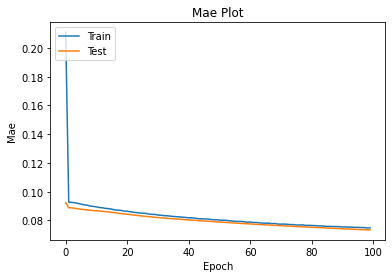

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mae Plot')
plt.ylabel('Mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

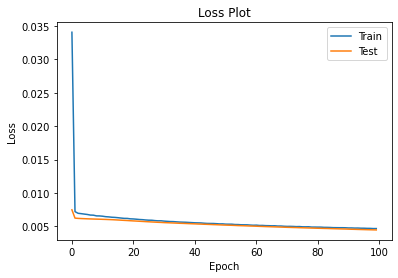

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()